<a href="https://colab.research.google.com/github/als1379/Movies-Analysis/blob/main/MovieAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub


# Dataset

## Download Dataset

In [182]:
# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7


In [183]:
movie_dataset = pd.read_csv(path + '/movies_metadata.csv', low_memory=False)

In [184]:
movie_dataset

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Describe Each Column

In [185]:
for col in movie_dataset.columns:
  print(f"Value counts for column '{col}':")
  print(movie_dataset[col].value_counts())
  print("-" * 20)

Value counts for column 'adult':
adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64
--------------------
Value counts for column 'belongs_to_collection':
belongs_to_collection
{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}                 2

## Drop Unuseful Columns

In [186]:
movie_dataset = movie_dataset.drop('adult', axis=1) # unbalance ( 99% is False )
movie_dataset = movie_dataset.drop('belongs_to_collection', axis=1) # No Information
movie_dataset = movie_dataset.drop('homepage', axis=1) # No Information
movie_dataset = movie_dataset.drop('id', axis=1) # No Information
movie_dataset = movie_dataset.drop('imdb_id', axis=1) # No Information
movie_dataset = movie_dataset.drop('original_title', axis=1) # No Information
movie_dataset = movie_dataset.drop('overview', axis=1) # Not Useful for this task
movie_dataset = movie_dataset.drop('poster_path', axis=1) # No Information
movie_dataset = movie_dataset.drop('production_countries', axis=1) # Too Complicated
movie_dataset = movie_dataset.drop('tagline', axis=1) # Not Useful for this task
movie_dataset = movie_dataset.drop('video', axis=1) # unbalance ( 99% is False )
movie_dataset = movie_dataset.drop('spoken_languages', axis=1) # we keep original language
movie_dataset = movie_dataset.drop('revenue', axis=1) # No Information ( 99% is zero )

print(movie_dataset.columns)

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'release_date', 'runtime', 'status', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


## Transform Other Columns

### Transform budget column from numerical to known and unknown

In [187]:
movie_dataset['budget']

,budget
0,30000000
1,65000000
2,0
3,16000000
4,0
...,...
45461,0
45462,0
45463,0
45464,0


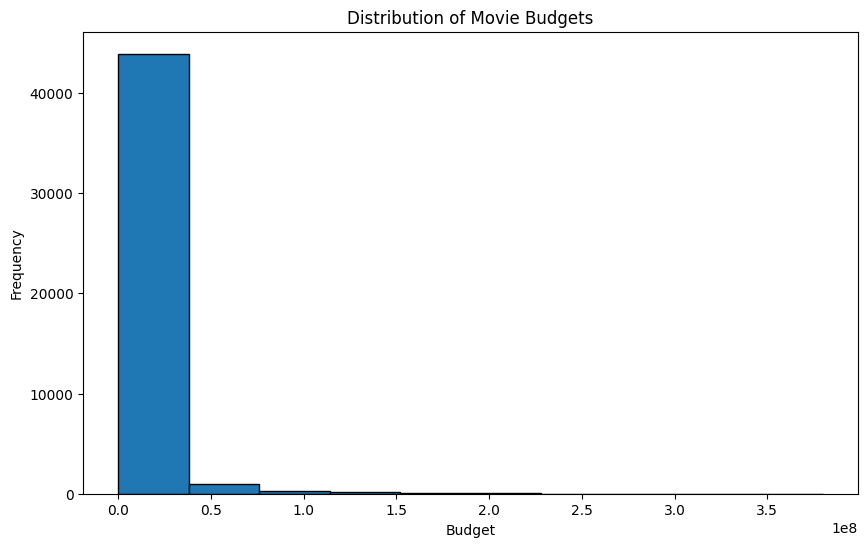

In [188]:
movie_dataset['budget'] = pd.to_numeric(movie_dataset['budget'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['budget'], bins=10, edgecolor='black')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets')
plt.show()

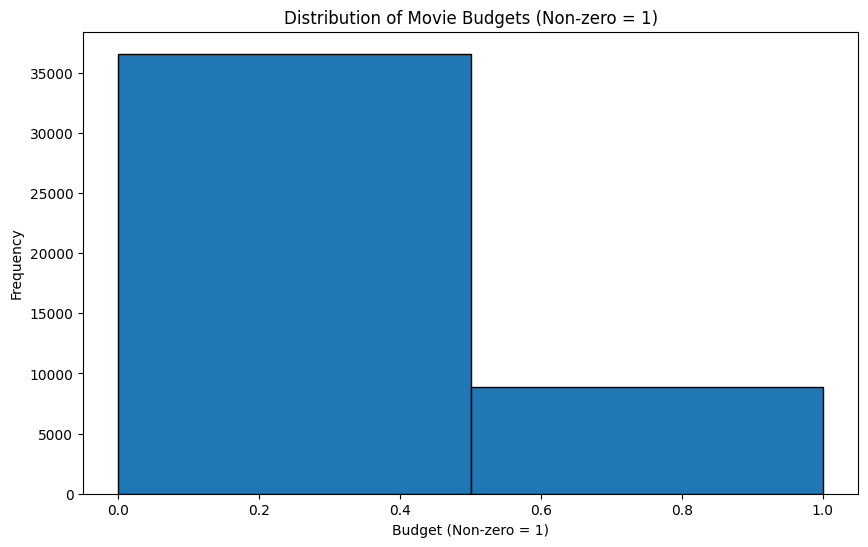

In [189]:
# Convert non-zero budget values to 1
movie_dataset['budget'] = movie_dataset['budget'].apply(lambda x: 1 if pd.notna(x) and x != 0 else x)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['budget'], bins=2, edgecolor='black')
plt.xlabel('Budget (Non-zero = 1)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets (Non-zero = 1)')
plt.show()

### Keeping only first genre and Encoding

In [190]:
movie_dataset['genres']

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"
...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,"[{'id': 18, 'name': 'Drama'}]"
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,[]


In [191]:
# prompt: genres column is a list of json keep only the 'name' value of first element and print value counts

import ast

def get_first_genre_name(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        if isinstance(genres_list, list) and genres_list and isinstance(genres_list[0], dict) and 'name' in genres_list[0]:
            return genres_list[0]['name']
    except (ValueError, SyntaxError, IndexError):
        pass  # Handle cases where genres_str is not a valid list of dictionaries
    return None  # Return None if extraction fails

# Apply the function to the 'genres' column
movie_dataset['genres'] = movie_dataset['genres'].apply(get_first_genre_name)

# Print value counts
print(movie_dataset['genres'].value_counts(dropna=False))

genres
Drama                   11966
Comedy                   8820
Action                   4489
Documentary              3415
Horror                   2619
None                     2442
Crime                    1685
Thriller                 1665
Adventure                1514
Romance                  1191
Animation                1124
Fantasy                   704
Science Fiction           647
Mystery                   554
Family                    524
Music                     487
Western                   451
TV Movie                  390
War                       379
History                   279
Foreign                   118
Carousel Productions        1
Aniplex                     1
Odyssey Media               1
Name: count, dtype: int64


In [192]:
# Drop rows with None values in the 'genres' column
movie_dataset = movie_dataset.dropna(subset=['genres'])

# Print value counts after dropping rows with None values
print(movie_dataset['genres'].value_counts(dropna=False))

genres
Drama                   11966
Comedy                   8820
Action                   4489
Documentary              3415
Horror                   2619
Crime                    1685
Thriller                 1665
Adventure                1514
Romance                  1191
Animation                1124
Fantasy                   704
Science Fiction           647
Mystery                   554
Family                    524
Music                     487
Western                   451
TV Movie                  390
War                       379
History                   279
Foreign                   118
Carousel Productions        1
Aniplex                     1
Odyssey Media               1
Name: count, dtype: int64


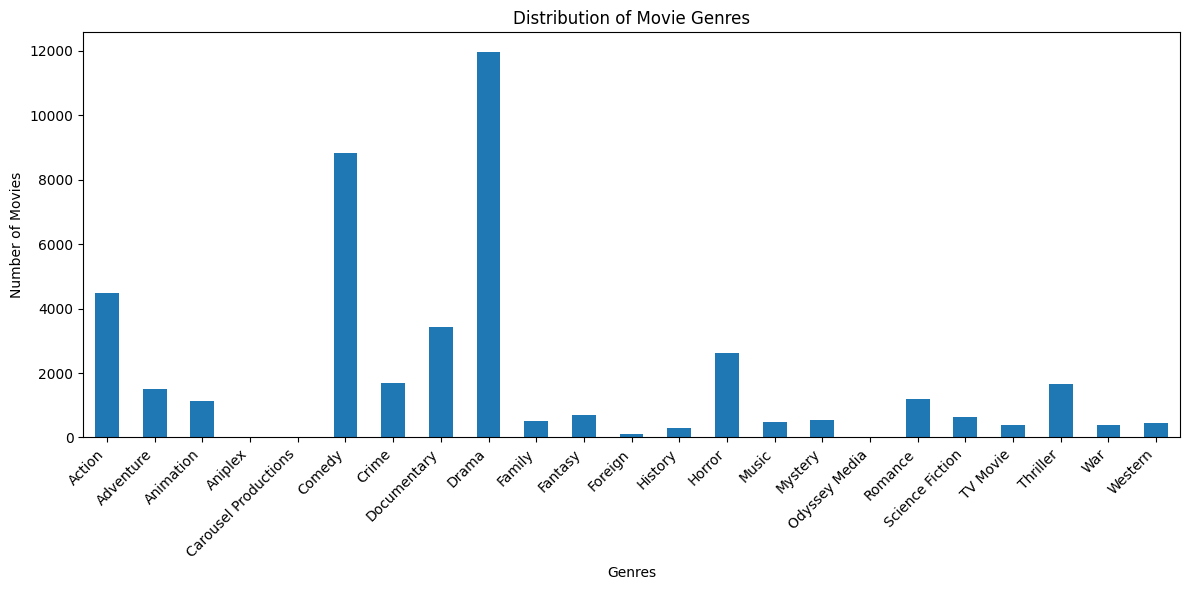

In [193]:
genre_counts = movie_dataset['genres'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

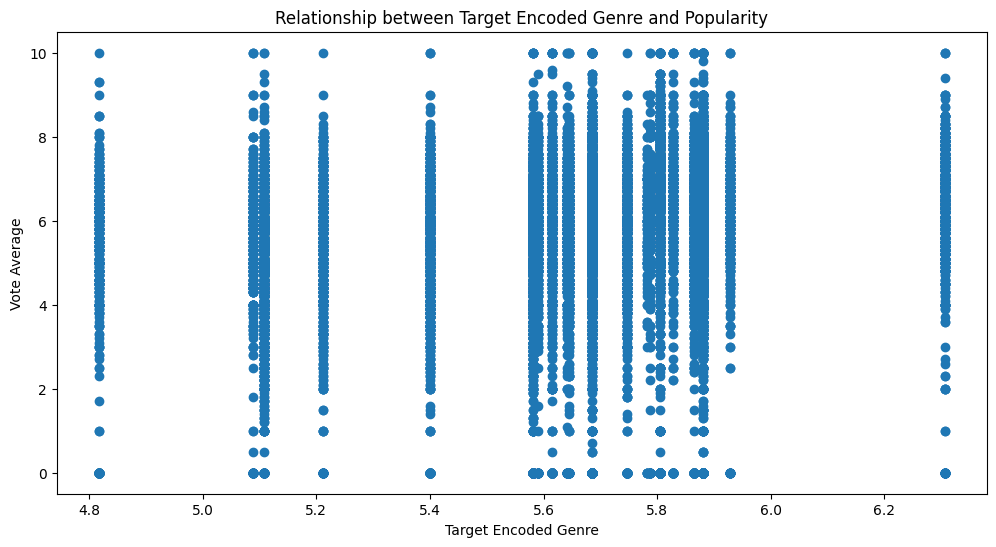

In [194]:
# Target Encoding
def target_encode_genres(df, target_column='vote_average'):
    # Calculate the mean popularity for each genre
    genre_popularity = df.groupby('genres')[target_column].mean()

    # Create a new column with the target encoded values
    df['genres'] = df['genres'].map(genre_popularity)

    return df, genre_popularity

movie_dataset, genre_popularity = target_encode_genres(movie_dataset)

# Example: Visualize the relationship between target encoded genre and popularity
plt.figure(figsize=(12, 6))
plt.scatter(movie_dataset['genres'], movie_dataset['vote_average'])
plt.xlabel('Target Encoded Genre')
plt.ylabel('Vote Average')
plt.title('Relationship between Target Encoded Genre and Popularity')
plt.show()

In [195]:
genre_popularity

,vote_average
genres,
Action,5.580816
Adventure,5.745971
Animation,6.305877
Aniplex,NaN
Carousel Productions,NaN
Comedy,5.686043
Crime,5.864926
Documentary,5.805388
Drama,5.881155


### Change type of release date keep year



In [196]:
# Convert 'release_date' to datetime objects, handling errors
movie_dataset['release_date'] = pd.to_datetime(movie_dataset['release_date'], errors='coerce')

# Extract the year and convert it to float
movie_dataset['release_year'] = movie_dataset['release_date'].dt.year.astype(float)

# Drop the original 'release_date' column
movie_dataset = movie_dataset.drop('release_date', axis=1)

### Convert original language to English and Non-English

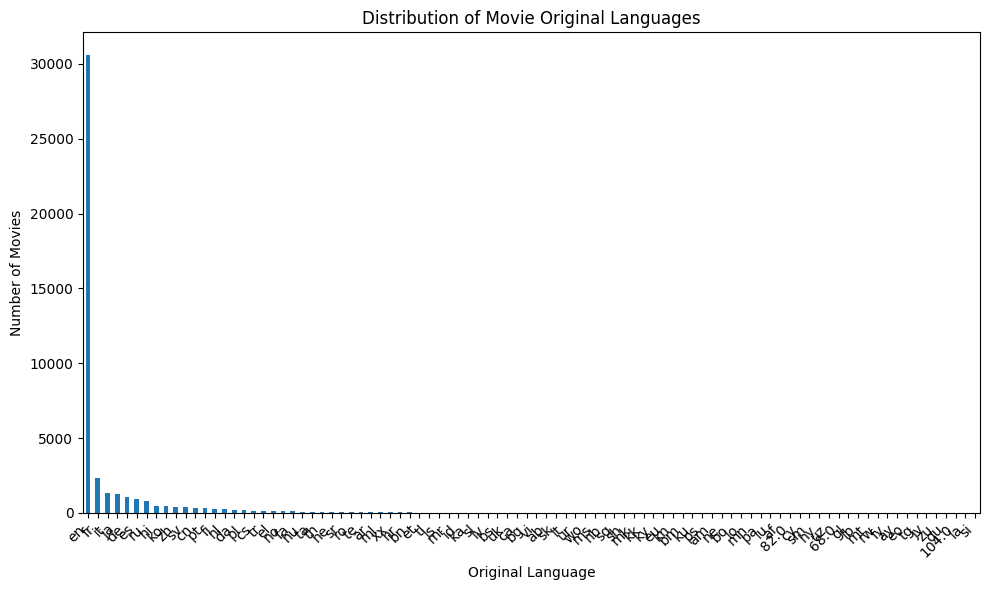

In [197]:
# Create the histogram
plt.figure(figsize=(10, 6))
movie_dataset['original_language'].value_counts().plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Original Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

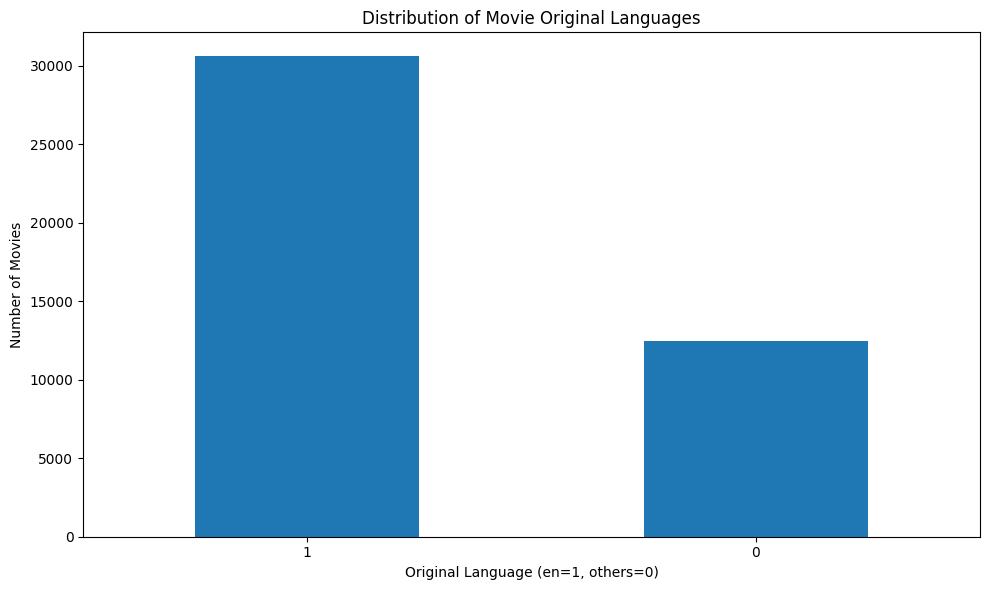

In [198]:
# prompt: convert en to 1 and others to 0 and plot histogram

# Convert 'original_language' to 1 if 'en', otherwise 0
movie_dataset['original_language'] = movie_dataset['original_language'].apply(lambda x: 1 if x == 'en' else 0)

# Create the histogram
plt.figure(figsize=(10, 6))
movie_dataset['original_language'].value_counts().plot(kind='bar')
plt.xlabel('Original Language (en=1, others=0)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Original Languages')
plt.xticks(rotation=0)  # No rotation for better readability with 0 and 1
plt.tight_layout()
plt.show()

### Only keep released movies

In [199]:
movie_dataset = movie_dataset[movie_dataset['status'] == 'Released']
movie_dataset['status'].value_counts()

,count
status,
Released,42630


In [200]:
movie_dataset = movie_dataset.drop('status', axis=1)

### Transform production company to knwon and unknown

In [201]:
# prompt: convert lists with 0 len to 0 and others to 1 in production company meta list

def process_production_companies(companies_str):
    try:
        companies_list = ast.literal_eval(companies_str)
        return 1 if len(companies_list) > 0 else 0
    except (ValueError, SyntaxError):
        return 0

movie_dataset['production_companies'] = movie_dataset['production_companies'].apply(process_production_companies)

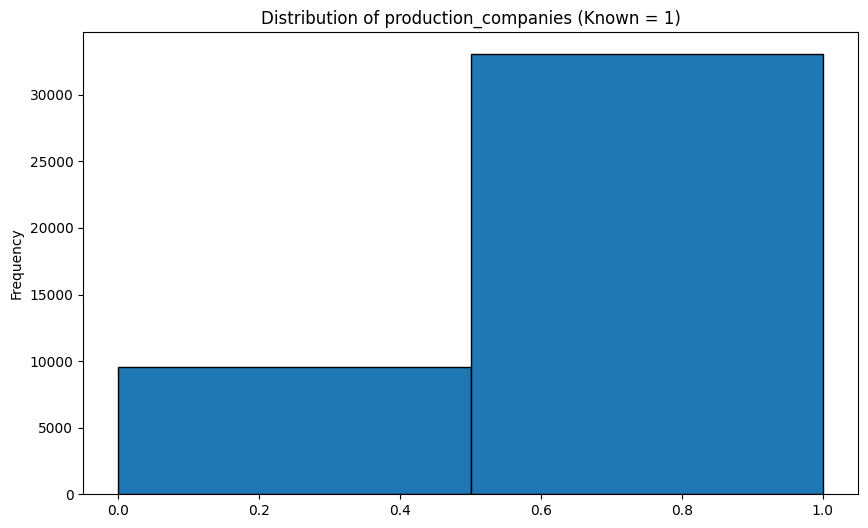

In [202]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['production_companies'], bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Distribution of production_companies (Known = 1)')
plt.show()

In [203]:
movie_dataset = movie_dataset.dropna()

### Descretize continous columns

In [204]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal')
movie_dataset[['popularity', 'vote_average', 'vote_count', 'runtime', 'release_year']] = discretizer.fit_transform(
    movie_dataset[['popularity', 'vote_average', 'vote_count', 'runtime', 'release_year']]
)


<ipython-input-204-d3a5dbc6447c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dataset[['popularity', 'vote_average', 'vote_count', 'runtime', 'release_year']] = discretizer.fit_transform(


### Clean Dataset


In [205]:
movie_dataset

,budget,genres,original_language,popularity,production_companies,runtime,title,vote_average,vote_count,release_year
0,1.0,6.305877,1,2.0,1,0.0,Toy Story,2.0,2.0,1.0
1,1.0,5.745971,1,2.0,1,2.0,Jumanji,2.0,2.0,1.0
2,0.0,5.615449,1,2.0,1,1.0,Grumpier Old Men,2.0,2.0,1.0
3,1.0,5.686043,1,2.0,1,2.0,Waiting to Exhale,1.0,2.0,1.0
4,0.0,5.686043,1,2.0,1,2.0,Father of the Bride Part II,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
45458,0.0,5.107980,1,0.0,1,0.0,The Burkittsville 7,2.0,0.0,1.0
45459,0.0,5.211437,1,0.0,1,0.0,Caged Heat 3000,0.0,0.0,1.0
45460,0.0,5.881155,1,2.0,1,2.0,Robin Hood,1.0,2.0,1.0
45462,0.0,5.881155,0,0.0,1,2.0,Century of Birthing,2.0,0.0,2.0


### Preprocessing Summery
1. **Column Removal:**  Drops several columns deemed unhelpful for the intended analysis or exhibiting high imbalance (e.g., 'adult', 'belongs_to_collection', 'homepage').  Columns like 'id', 'imdb_id', 'original_title', 'overview', 'poster_path', and others are also removed.  This significantly reduces the dimensionality of the dataset.

2. **Data Transformation:**

   * **Budget:** Converts the 'budget' column to numerical values, then transforms it into a binary feature (1 if the budget is non-zero, otherwise the original value remains). This simplifies the budget representation.
   * **Genres:** Extracts the first genre from a list of genres associated with each movie. Handles cases where the genre information is not in the expected format. Then, it applies target encoding to the 'genres' column, replacing genre names with the average 'vote_average' for that genre.  This converts categorical genre data into numerical data that reflects popularity. Movies with no genre information are dropped.
   * **Release Date:** Only keep the year and change its type tp float.
   * **Original Language:** Converts the 'original_language' column to a binary feature (1 for English, 0 otherwise).
   * **Status:** Filters the dataset to include only movies with the 'Released' status, then removes the status column.
   * **Production Companies:**  Transforms the 'production_companies' column into a binary representation (1 if there's at least one production company listed, 0 otherwise).
3. **Descretize Continuous Columns:**  For more covinient use of the continuous columns we descritize them into 3 bins ['popularity', 'vote_average', 'vote_count', 'runtime', 'release_year'].



In essence, the preprocessing aims to clean the data by removing irrelevant or noisy features, convert categorical features into numerical ones (either binary or target-encoded), and prepare the dataset for further analysis or modeling.  The visualizations help to assess the effect of these transformations on the data distributions.


# Model

In [206]:
! pip install pgmpy

In [207]:
! sudo apt-get install graphviz graphviz-dev
! pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


## Manual Models

In [208]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import BicScore, K2Score, MaximumLikelihoodEstimator, ParameterEstimator, HillClimbSearch
from PIL import Image

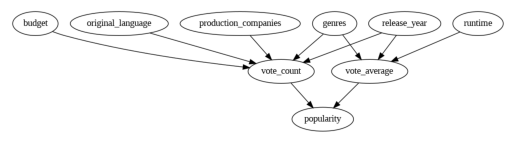

In [209]:
# Define Bayesian Network structure
manual_model_1 = BayesianNetwork([
    ('budget', 'vote_count'),
    ('genres', 'vote_average'),
    ('genres', 'vote_count'),
    ('original_language', 'vote_count'),
    ('production_companies', 'vote_count'),
    ('release_year', 'vote_count'),
    ('release_year', 'vote_average'),
    ('vote_count', 'popularity'),
    ('vote_average', 'popularity'),
    ('runtime', 'vote_average')
])

# Fit the model
manual_model_1.fit(movie_dataset, estimator=MaximumLikelihoodEstimator)

model_graphviz = manual_model_1.to_graphviz()

# Plot the model.
model_graphviz.draw("network_manual_model_1.png", prog="dot")


# Open the image
img = Image.open("network_manual_model_1.png")

# Show the image using matplotlib
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

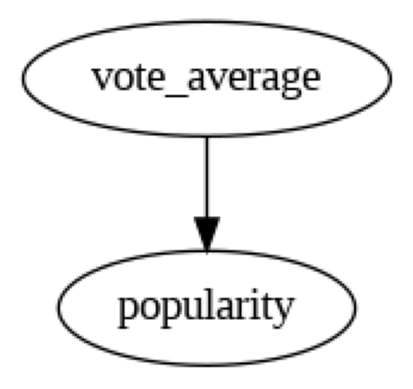

In [210]:
manual_model_2 = BayesianNetwork([
    ('vote_average', 'popularity'),
])

# Fit the model
manual_model_2.fit(movie_dataset, estimator=MaximumLikelihoodEstimator)

# Perform inference
inference_manual_model_2 = VariableElimination(manual_model_2)

model_graphviz = manual_model_2.to_graphviz()

# Plot the model.
model_graphviz.draw("network_manual_model_2.png", prog="dot")

# Open the image
img = Image.open("network_manual_model_2.png")

# Show the image using matplotlib
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

## Hill Climb Search Algorithm Model

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Network Structure:
[('budget', 'production_companies'), ('genres', 'vote_average'), ('genres', 'popularity'), ('genres', 'release_year'), ('genres', 'original_language'), ('original_language', 'budget'), ('original_language', 'production_companies'), ('popularity', 'vote_count'), ('popularity', 'production_companies'), ('popularity', 'original_language'), ('runtime', 'genres'), ('runtime', 'popularity'), ('runtime', 'budget'), ('runtime', 'vote_count'), ('vote_average', 'original_language'), ('vote_count', 'budget'), ('vote_count', 'vote_average'), ('vote_count', 'release_year'), ('release_year', 'production_companies'), ('release_year', 'budget')]


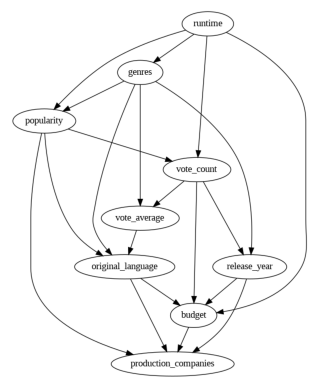

In [211]:
df = movie_dataset.sample(34000, random_state=42)
# Learn the structure using Hill Climbing and BIC scoring
hc = HillClimbSearch(df)
best_model = hc.estimate(scoring_method=BicScore(df))

# Print the learned structure
print("Learned Network Structure:")
print(best_model.edges())

# Define the Bayesian Network using the learned structure
hill_climb_model = BayesianNetwork(best_model.edges())
# inference_hill_climb_model = VariableElimination(hill_climb_model)
hill_climb_model.fit(movie_dataset, estimator=MaximumLikelihoodEstimator)

model_graphviz = hill_climb_model.to_graphviz()

# Plot the model.
model_graphviz.draw("network_hill_climb_model.png", prog="dot")

# Open the image
img = Image.open("network_hill_climb_model.png")

# Show the image using matplotlib
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

In [212]:
# Create scoring objects
bic = BicScore(movie_dataset)
k2 = K2Score(movie_dataset)

# Score your manual model 1
bic_score_manual = bic.score(manual_model_1)
k2_score_manual = k2.score(manual_model_1)

print("Manual 1 BN BIC Score:", bic_score_manual)
print("Manual 1 BN K2 Score:", k2_score_manual)

# Score your manual model 2
bic_score_manual = bic.score(manual_model_2)
k2_score_manual = k2.score(manual_model_2)

print("Manual 2 BN BIC Score:", bic_score_manual)
print("Manual 2 BN K2 Score:", k2_score_manual)

bic_score_hillclimb = bic.score(hill_climb_model)
k2_score_hillclimb = k2.score(hill_climb_model)

print("Hillclimb 2 BN BIC Score:", bic_score_hillclimb)
print("Hillclimb 2 BN K2 Score:", k2_score_hillclimb)

Manual 1 BN BIC Score: -377344.4699068211
Manual 1 BN K2 Score: -372279.41636439157
Manual 2 BN BIC Score: -92116.23867911042
Manual 2 BN K2 Score: -92109.53062776377
Hillclimb 2 BN BIC Score: -362371.6123162967
Hillclimb 2 BN K2 Score: -360568.2808558926


In [213]:
def average_log_likelihood(bn_model, df):
    # Returns the average log-likelihood of df under bn_model
    est = MaximumLikelihoodEstimator(bn_model, df)
    log_likelihood = 0
    for index, row in df.iterrows():
        row_prob = 1.0
        for cpd in bn_model.get_cpds():
            variables = [cpd.variable] + list(cpd.variables[1:])  # variable + parents
            # Extract the relevant values from 'row'
            values = {var: row[var] for var in variables}
            # Probability of this instance for 'cpd.variable'
            p = cpd.get_value(**values)
            row_prob *= p
        if row_prob > 0:
            log_likelihood += np.log(row_prob)
        else:
            # If zero probability, the data point is impossible under the model
            # Could add a small epsilon or handle differently
            log_likelihood += -np.inf
    return log_likelihood / len(df)  # average per sample

# Example usage:
ll_manual_1 = average_log_likelihood(manual_model_1, movie_dataset)
ll_manual_2 = average_log_likelihood(manual_model_2, movie_dataset)
ll_hc = average_log_likelihood(hill_climb_model, movie_dataset)

print("Average Log-Likelihood (Manual Model 1):", ll_manual_1)
print("Average Log-Likelihood (Manual Model 2):", ll_manual_2)
print("Average Log-Likelihood (HillClimb Model):", ll_hc)


Average Log-Likelihood (Manual Model 1): -8.72103836182497
Average Log-Likelihood (Manual Model 2): -2.1697564690473836
Average Log-Likelihood (HillClimb Model): -8.450684863797461


In [214]:
inference = VariableElimination(hill_climb_model)

In [215]:
# Query 1: Probability of high vote average given known production companies and high budget
query1 = inference.query(variables=['vote_average'], evidence={'production_companies': 1, 'budget': 1})
print("Query 1 Result:")
print(query1)

# Query 2: Most likely genre given high vote count and low runtime
query2 = inference.map_query(variables=['genres'], evidence={'vote_count': 2, 'runtime': 0})
print("\nQuery 2 Result:")
print(query2)
closest_genre = genre_popularity.sub(query2['genres']).abs().idxmin()
print(f"The genre corresponding to the value {query2['genres']} is: {closest_genre}")

# Query 3: Joint probability of being in English, known production company, and high vote average
query3 = inference.query(
    variables=['original_language', 'production_companies'],
    evidence={'vote_average': 2}
)
print("\nQuery 3 Result:")
print(query3)


Query 1 Result:
+-------------------+---------------------+
| vote_average      |   phi(vote_average) |
+===================+=====================+
| vote_average(0.0) |              0.2248 |
+-------------------+---------------------+
| vote_average(1.0) |              0.3659 |
+-------------------+---------------------+
| vote_average(2.0) |              0.4093 |
+-------------------+---------------------+


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Query 2 Result:
{'genres': 5.686043083900227}
The genre corresponding to the value 5.686043083900227 is: Comedy

Query 3 Result:
+----------------------+-------------------------+-----------------------------------------------+
| original_language    | production_companies    |   phi(original_language,production_companies) |
+======================+=========================+===============================================+
| original_language(0) | production_companies(0) |                                        0.0691 |
+----------------------+-------------------------+-----------------------------------------------+
| original_language(0) | production_companies(1) |                                        0.2985 |
+----------------------+-------------------------+-----------------------------------------------+
| original_language(1) | production_companies(0) |                                        0.1391 |
+----------------------+-------------------------+----------------------------

In [216]:
query = inference.query(variables=['vote_average', 'vote_count'], evidence={'original_language': 1, 'production_companies': 1, 'genres': genre_popularity['Action']})
print(query)
query = inference.query(variables=['vote_average', 'vote_count'], evidence={'original_language': 0, 'production_companies': 1, 'genres': genre_popularity['Action']})
print(query)

+-------------------+-----------------+--------------------------------+
| vote_average      | vote_count      |   phi(vote_average,vote_count) |
+===================+=================+================================+
| vote_average(0.0) | vote_count(0.0) |                         0.1057 |
+-------------------+-----------------+--------------------------------+
| vote_average(0.0) | vote_count(1.0) |                         0.1372 |
+-------------------+-----------------+--------------------------------+
| vote_average(0.0) | vote_count(2.0) |                         0.1547 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(0.0) |                         0.0413 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(1.0) |                         0.0961 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(2.0) |            

#

In [217]:
query = inference.query(variables=['vote_average'], evidence={'original_language': 1, 'production_companies': 1, 'genres': genre_popularity['Fantasy']})
print(query)
query = inference.query(variables=['vote_average'], evidence={'original_language': 1, 'production_companies': 0, 'genres': genre_popularity['Fantasy']})
print(query)


+-------------------+---------------------+
| vote_average      |   phi(vote_average) |
+===================+=====================+
| vote_average(0.0) |              0.3885 |
+-------------------+---------------------+
| vote_average(1.0) |              0.3650 |
+-------------------+---------------------+
| vote_average(2.0) |              0.2465 |
+-------------------+---------------------+
+-------------------+---------------------+
| vote_average      |   phi(vote_average) |
+===================+=====================+
| vote_average(0.0) |              0.5226 |
+-------------------+---------------------+
| vote_average(1.0) |              0.2811 |
+-------------------+---------------------+
| vote_average(2.0) |              0.1963 |
+-------------------+---------------------+


In [218]:
query = inference.query(variables=['vote_average'], evidence={'original_language': 1, 'production_companies': 1, 'genres': genre_popularity['Drama']})
print(query)
query = inference.query(variables=['vote_average'], evidence={'original_language': 1, 'production_companies': 0, 'genres': genre_popularity['Drama']})
print(query)


+-------------------+---------------------+
| vote_average      |   phi(vote_average) |
+===================+=====================+
| vote_average(0.0) |              0.2670 |
+-------------------+---------------------+
| vote_average(1.0) |              0.3394 |
+-------------------+---------------------+
| vote_average(2.0) |              0.3935 |
+-------------------+---------------------+
+-------------------+---------------------+
| vote_average      |   phi(vote_average) |
+===================+=====================+
| vote_average(0.0) |              0.3842 |
+-------------------+---------------------+
| vote_average(1.0) |              0.3136 |
+-------------------+---------------------+
| vote_average(2.0) |              0.3021 |
+-------------------+---------------------+
